<a href="https://colab.research.google.com/github/vaish737/interntask7/blob/main/realtimequality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time
import pandas as pd
from sklearn.ensemble import IsolationForest

# Step 1: Simulate Streaming Data
def data_stream():
    """Simulate streaming data."""
    while True:
        yield {
            "temperature": random.uniform(-5, 50),  # Temperature in Celsius
            "humidity": random.uniform(0, 100),    # Humidity in %
            "pressure": random.uniform(950, 1050)  # Pressure in hPa
        }
        time.sleep(1)  # Simulate 1-second intervals

# Step 2: Preprocess Data
def preprocess_data(data):
    """Clean and normalize data."""
    df = pd.DataFrame([data])
    df["temperature"] = df["temperature"].clip(-10, 50)  # Cap extreme values
    df["humidity"] = df["humidity"].fillna(50)           # Fill missing values
    return df

# Step 3: Define Validation Rules
def validate_data(data):
    """Basic rule-based validation."""
    errors = []
    if not (-10 <= data["temperature"] <= 50):
        errors.append("Temperature out of range")
    if not (0 <= data["humidity"] <= 100):
        errors.append("Humidity out of range")
    if not (900 <= data["pressure"] <= 1100):
        errors.append("Pressure out of range")
    return errors

# Step 4: Train an AI Model
# Generate synthetic data for training
training_data = pd.DataFrame({
    "temperature": [random.uniform(-10, 50) for _ in range(1000)],
    "humidity": [random.uniform(0, 100) for _ in range(1000)],
    "pressure": [random.uniform(950, 1050) for _ in range(1000)],
})

# Train an Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(training_data)

def ai_validation(data):
    """AI-based anomaly detection."""
    df = pd.DataFrame([data])
    anomaly = model.predict(df)[0]
    return "Anomaly detected" if anomaly == -1 else "Valid"

# Step 5: Stream Data and Validate
for raw_data in data_stream():
    print("Raw Data:", raw_data)

    # Preprocess
    processed_data = preprocess_data(raw_data)
    print("Processed Data:", processed_data)

    # Rule-Based Validation
    rule_errors = validate_data(raw_data)
    if rule_errors:
        print("Rule-Based Errors:", rule_errors)

    # AI-Based Validation
    ai_result = ai_validation(raw_data)
    print("AI Validation Result:", ai_result)

    print("=" * 50)


Raw Data: {'temperature': 45.67230649075202, 'humidity': 4.6364590768544485, 'pressure': 952.3787007908807}
Processed Data:    temperature  humidity    pressure
0    45.672306  4.636459  952.378701
AI Validation Result: Anomaly detected
Raw Data: {'temperature': 20.08762909686834, 'humidity': 84.2835756477224, 'pressure': 1044.2898993608349}
Processed Data:    temperature   humidity     pressure
0    20.087629  84.283576  1044.289899
AI Validation Result: Valid
Raw Data: {'temperature': 25.44229999875575, 'humidity': 52.00635546429972, 'pressure': 980.5443978988444}
Processed Data:    temperature   humidity    pressure
0      25.4423  52.006355  980.544398
AI Validation Result: Valid
Raw Data: {'temperature': 17.568015739895685, 'humidity': 40.584235214641815, 'pressure': 980.9808024725554}
Processed Data:    temperature   humidity    pressure
0    17.568016  40.584235  980.980802
AI Validation Result: Valid
Raw Data: {'temperature': 7.553850120805183, 'humidity': 95.92733585735355, 'p

KeyboardInterrupt: 

Processed Data with Validation:
    temperature   humidity     pressure status
34    43.761333  97.336035   964.322505  Valid
35    40.519480  49.669528   969.994536  Valid
36     6.748828  16.358879  1044.037802  Valid
37    11.812627  53.920519  1033.988805  Valid
38    26.578610  35.846922  1028.478315  Valid
39    22.652917  55.628606   979.815055  Valid
40     1.960245  84.950295  1008.174609  Valid
41     4.331129  42.183556  1042.555295  Valid
42    32.588928  65.515577  1004.900887  Valid
43    41.726983  80.816631   985.923223  Valid


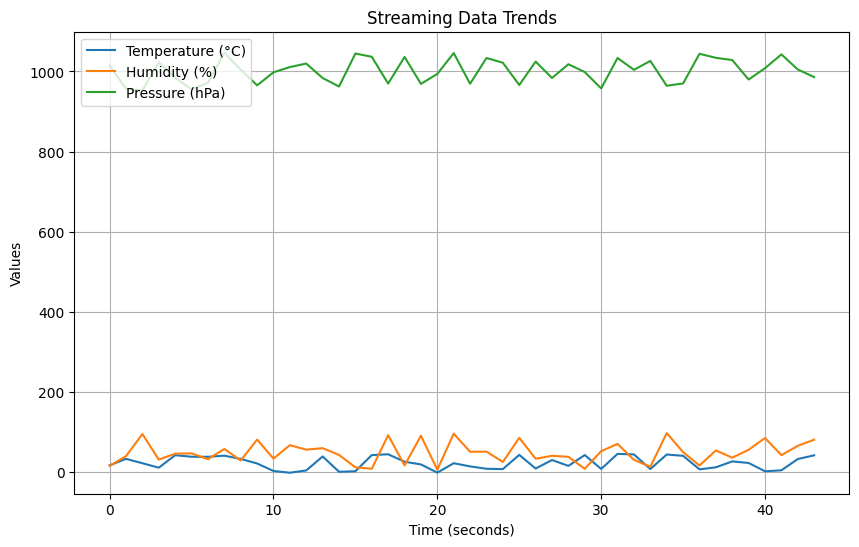

KeyboardInterrupt: 

In [ ]:
import random
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Initialize Historical Data
historical_data = pd.DataFrame(columns=["temperature", "humidity", "pressure", "status"])

# Simulate Streaming Data
def data_stream():
    while True:
        yield {
            "temperature": random.uniform(-5, 50),
            "humidity": random.uniform(0, 100),
            "pressure": random.uniform(950, 1050)
        }
        time.sleep(1)

# Preprocessing and Validation
def preprocess_data(data):
    df = pd.DataFrame([data])
    df["temperature"] = df["temperature"].clip(-10, 50)
    df["humidity"] = df["humidity"].fillna(50)
    return df

# AI Model Setup
training_data = pd.DataFrame({
    "temperature": [random.uniform(-10, 50) for _ in range(1000)],
    "humidity": [random.uniform(0, 100) for _ in range(1000)],
    "pressure": [random.uniform(950, 1050) for _ in range(1000)],
})
model = IsolationForest(contamination=0.05)
model.fit(training_data)

def ai_validation(data):
    df = pd.DataFrame([data])
    return "Anomaly detected" if model.predict(df)[0] == -1 else "Valid"

# Real-Time Streaming with Visualization
for raw_data in data_stream():
    # Preprocess Data
    processed_data = preprocess_data(raw_data)
    status = ai_validation(raw_data)
    processed_data["status"] = status

    # Append to Historical Data
    historical_data = pd.concat([historical_data, processed_data], ignore_index=True)

    # Clear Previous Output
    clear_output(wait=True)

    # Display Updated Historical Data
    print("Processed Data with Validation:")
    print(historical_data.tail(10))  # Show last 10 records

    # Plot Real-Time Data
    plt.figure(figsize=(10, 6))
    plt.plot(historical_data["temperature"], label="Temperature (°C)")
    plt.plot(historical_data["humidity"], label="Humidity (%)")
    plt.plot(historical_data["pressure"], label="Pressure (hPa)")
    plt.legend(loc="upper left")
    plt.title("Streaming Data Trends")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()
